In [46]:
import pandas as pd

In [47]:
df = pd.read_csv('data/test/오존.csv')
df1 = pd.read_csv('data/test/평균기온.csv')
df2 = pd.read_csv('data/test/평균최고기온.csv')
df3 = pd.read_csv('data/test/평균최저기온.csv')
df4 = pd.read_csv('data/test/평균증기압.csv')

In [48]:
# df와 df1을 'STD_YYYYMM'과 'SIDO' 열을 기준으로 병합 (inner join)
result_df = pd.merge(df, df1, on=['STD_YYYYMM', 'SIDO'], how='inner')

In [49]:
# result_df와 df2을 'STD_YYYYMM'과 'SIDO' 열을 기준으로 병합 (inner join)
result_df = pd.merge(result_df, df2, on=['STD_YYYYMM', 'SIDO'], how='inner')

In [50]:
# result_df와 df3을 'STD_YYYYMM'과 'SIDO' 열을 기준으로 병합 (inner join)
result_df = pd.merge(result_df, df3, on=['STD_YYYYMM', 'SIDO'], how='inner')

In [51]:
# result_df와 df4을 'STD_YYYYMM'과 'SIDO' 열을 기준으로 병합 (inner join)
result_df = pd.merge(result_df, df4, on=['STD_YYYYMM', 'SIDO'], how='inner')

In [52]:
result_df.head(2)

,SIDO,STD_YYYYMM,AVG_오존,오존_BAD,오존0.06_BAD,오존0.1_BAD,평균기온,평균최고기온,평균최저기온,평균증기압
0,서울특별시,201001,0.011,N,N,N,-4.5,-0.7,-8.1,3.1
1,부산광역시,201001,0.021,N,N,N,3.0,7.7,-1.1,3.5


In [53]:
dd = result_df['STD_YYYYMM'].dtype

print(f"result_df['STD_YYYYMM'].dtype: {dd}")

result_df['STD_YYYYMM'].dtype: int64


In [54]:
result_df.tail()

,SIDO,STD_YYYYMM,AVG_오존,오존_BAD,오존0.06_BAD,오존0.1_BAD,평균기온,평균최고기온,평균최저기온,평균증기압
2491,충청남도,202212,0.0218,N,N,N,-2.2,3.1,-6.9,3.8
2492,전라북도,202212,0.0230,N,N,N,-1.1,4.1,-5.7,4.0
2493,전라남도,202212,0.0248,N,N,N,2.1,6.6,-1.9,4.7
2494,경상북도,202212,0.0240,N,N,N,-1.1,4.1,-5.8,3.3
2495,제주특별자치도,202212,0.0365,Y,N,N,6.8,9.8,4.0,6.6


In [55]:
import numpy as np
from pmdarima import auto_arima
import matplotlib.pyplot as plt


# 'STD_YYYYMM'을 datetime으로 변환
result_df['STD_YYYYMM'] = pd.to_datetime(result_df['STD_YYYYMM'], format='%Y%m')

# 'SIDO' 컬럼이 있다면, 필요에 따라 특정 지역만 선택하거나 전체 데이터를 사용
# 예시: 서울시 데이터만 선택
# result_df = result_df[result_df['SIDO'] == '서울']

# 전체 데이터셋의 'AVG_오존' 평균값 또는 중앙값으로 NaN 대체
result_df['AVG_오존'].fillna(result_df['AVG_오존'].mean(), inplace=True)

ts = result_df.groupby('STD_YYYYMM')['AVG_오존'].mean()



In [56]:

# ARIMA 모델 설정
# auto_arima 함수는 최적의 ARIMA 파라미터를 자동으로 찾아줍니다.
model = auto_arima(ts, seasonal=True, m=12, trace=True)

# 모델 요약 정보 출력
model.summary()

Performing stepwise search to minimize aic


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-1323.319, Time=0.90 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-1047.326, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-1223.104, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-649.942, Time=0.03 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=-1234.433, Time=0.75 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=-1299.002, Time=0.60 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=-1327.752, Time=1.72 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=-1316.779, Time=1.51 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=-1327.589, Time=1.91 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=-1323.547, Time=1.67 sec
 ARIMA(1,0,2)(2,0,1)[12] intercept   : AIC=-1303.519, Time=1.47 sec
 ARIMA(2,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=2.19 sec
 ARIMA(3,0,2)(2,0,1)[12] intercept   : AIC=-1299.053, Time=2.29 sec
 ARIMA(2,0,3)(2,0,1)[12] intercept   : AIC=-1313.007, Time=2.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  156
Model:             SARIMAX(0, 0, 2)x(2, 0, 2, 12)   Log Likelihood                 679.934
Date:                            Tue, 28 Nov 2023   AIC                          -1343.869
Time:                                    10:09:13   BIC                          -1319.470
Sample:                                01-01-2010   HQIC                         -1333.959
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0015      0.001      1.414      0.157      -0.001       0.004
ma.L1          0.1783      0.078      2.286      0.022       0.025       0.331
ma.L2          0.1150      0.077      1.501      0.133      -0.035       0.265
ar.S.L12       0.2360      0.424      0.556      0.578      -0.595       1.067
ar.S.L24       0.7107      0.407      1.747      0.081      -0.087       1.508
ma.S.L12       0.3031      0.457      0.663      0.507      -0.593       1.199
ma.S.L24      -0.4140      0.175     -2.365      0.018      -0.757      -0.071
sigma2      8.287e-06   9.86e-07      8.402      0.000    6.35e-06    1.02e-05
===================================================================================
Ljung-Box (L1) (Q):                   1.58   Jarque-Bera (JB):                 3.52
Prob(Q):                              0.21   Prob(JB):                         0.17
Heteroskedasticity (H):               2.04   Skew:                             0.08
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
# ts의 인덱스 확인
print(ts.index)

# 필요한 경우 ts의 인덱스를 datetime으로 변환
# ts.index = pd.to_datetime(ts.index)


DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01',
               ...
               '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01'],
              dtype='datetime64[ns]', name='STD_YYYYMM', length=156, freq=None)


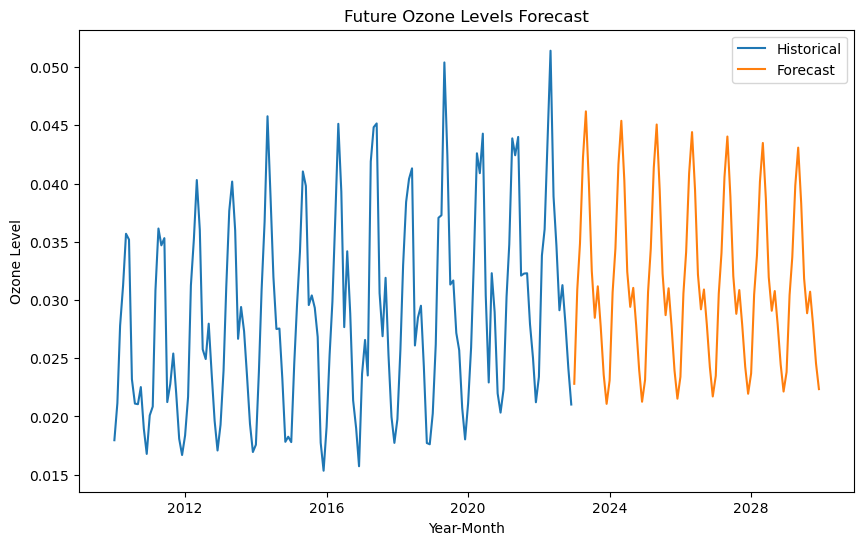

In [58]:
# 2023년 1월부터 2030년 1월까지 예측 (84개월)
future_forecast = model.predict(n_periods=84)

# 예측 결과를 DataFrame으로 변환
# future_dates의 생성 확인
future_dates = pd.date_range(start='2023-01', end='2030-01', freq='MS')
forecast_df = pd.DataFrame(future_forecast, index=future_dates, columns=['Prediction'])

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Historical')
plt.plot(forecast_df, label='Forecast')
plt.title('Future Ozone Levels Forecast')
plt.xlabel('Year-Month')
plt.ylabel('Ozone Level')
plt.legend()
plt.show()

In [59]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# 데이터 분할
train_size = int(len(ts) * 0.8)
train, test = ts[0:train_size], ts[train_size:len(ts)]

# 모델 훈련 (예: 중앙값을 사용한 경우)
model = auto_arima(train, seasonal=True, m=12)

# 테스트 데이터에 대한 예측 수행
forecast = model.predict(n_periods=len(test))

# 성능 평가
mse = mean_squared_error(test, forecast)
rmse = sqrt(mse)

print(f"Test MSE: {mse}")
print(f"Test RMSE: {rmse}")


Test MSE: 9.166569323447532e-06
Test RMSE: 0.003027634278351256


In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# 실제 값과 예측 값을 비교하여 오류 계산
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, forecast)

# MAPE 계산
mape = np.mean(np.abs((test - forecast) / test)) * 100

# 결과 출력
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


Mean Absolute Error (MAE): 0.0022280261763592043
Mean Squared Error (MSE): 9.166569323447532e-06
Root Mean Squared Error (RMSE): 0.003027634278351256
Mean Absolute Percentage Error (MAPE): 7.134003487238831%


In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# 데이터를 훈련 세트와 테스트 세트로 분할
train_size = int(len(ts) * 0.8)
train, test = ts[0:train_size], ts[train_size:len(ts)]

# 훈련 세트를 사용하여 모델 훈련
model = auto_arima(train, seasonal=True, m=12)

# 테스트 세트에 대한 예측 수행
forecast = model.predict(n_periods=len(test))

# 성능 지표 계산
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, forecast)
mape = np.mean(np.abs((test - forecast) / test)) * 100

# 결과 출력
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


Mean Absolute Error (MAE): 0.0022280261763592043
Mean Squared Error (MSE): 9.166569323447532e-06
Root Mean Squared Error (RMSE): 0.003027634278351256
Mean Absolute Percentage Error (MAPE): 7.134003487238831%


In [ ]:
# 'STD_YYYYMM'을 인덱스로 사용
result_df['STD_YYYYMM'] = pd.to_datetime(result_df['STD_YYYYMM'], format='%Y%m')
result_df = result_df.set_index('STD_YYYYMM')

In [69]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np


# 시계열 데이터 정규화
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(result_df['AVG_오존'].values.reshape(-1, 1))


# 새로운 look_back 값 설정
new_look_back = 60  # 예제에서는 10 타임 스텝을 사용하겠습니다.

# 데이터셋 준비 함수
def create_dataset(dataset, look_back=new_look_back):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# 훈련 데이터와 테스트 데이터 분할
look_back = 1
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# LSTM 모델 구축
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 훈련
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

# 테스트 데이터에 대한 예측
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# 예측 결과의 역변환
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

# 성능 평가
train_score = np.sqrt(mean_squared_error(Y_train[0], train_predict[:, 0]))
test_score = np.sqrt(mean_squared_error(Y_test[0], test_predict[:, 0]))
print(f'Train RMSE: {train_score}, Test RMSE: {test_score}')


Epoch 1/100
1994/1994 - 6s - loss: 0.0210 - 6s/epoch - 3ms/step
Epoch 2/100
1994/1994 - 3s - loss: 0.0166 - 3s/epoch - 2ms/step
Epoch 3/100
1994/1994 - 3s - loss: 0.0167 - 3s/epoch - 2ms/step
Epoch 4/100
1994/1994 - 3s - loss: 0.0165 - 3s/epoch - 2ms/step
Epoch 5/100
1994/1994 - 3s - loss: 0.0166 - 3s/epoch - 2ms/step
Epoch 6/100
1994/1994 - 3s - loss: 0.0169 - 3s/epoch - 2ms/step
Epoch 7/100
1994/1994 - 3s - loss: 0.0166 - 3s/epoch - 2ms/step
Epoch 8/100
1994/1994 - 3s - loss: 0.0166 - 3s/epoch - 1ms/step
Epoch 9/100
1994/1994 - 3s - loss: 0.0166 - 3s/epoch - 1ms/step
Epoch 10/100
1994/1994 - 3s - loss: 0.0166 - 3s/epoch - 1ms/step
Epoch 11/100
1994/1994 - 3s - loss: 0.0166 - 3s/epoch - 1ms/step
Epoch 12/100
1994/1994 - 3s - loss: 0.0165 - 3s/epoch - 1ms/step
Epoch 13/100
1994/1994 - 3s - loss: 0.0166 - 3s/epoch - 1ms/step
Epoch 14/100
1994/1994 - 3s - loss: 0.0166 - 3s/epoch - 1ms/step
Epoch 15/100
1994/1994 - 3s - loss: 0.0166 - 3s/epoch - 2ms/step
Epoch 16/100
1994/1994 - 3s - loss

In [72]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                10400     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
time_steps = 1  # 각 데이터 포인트가 한 시점의 정보만을 포함
features = 1    # 'AVG_오존' 특성 하나만 사용


# 예측할 미래 기간 설정 (예: 2023년부터 2030년까지)
future_periods = 12 * (2030 - 2023 + 1)

# 마지막 관측값으로부터 미래 예측 시작
# last_obs의 형태를 모델이 기대하는 형태로 조정 (예: (1, time steps, features))
last_obs = scaled_data[-1].reshape(1, time_steps, features)
future_forecast = []

# 미래 데이터 예측
for _ in range(future_periods):
    prediction = model.predict(last_obs)
    future_forecast.append(prediction[0,0])
    # 예측된 값을 다음 입력으로 사용하려면 형태를 맞춰야 함
    last_obs = np.array([[[prediction[0,0]]]])  # (1, 1, 1) 형태로 조정

# 예측 결과의 역변환
future_forecast = scaler.inverse_transform(np.array(future_forecast).reshape(-1, 1))

# 시각화를 위한 날짜 생성
future_dates = pd.date_range(start='2023-01', periods=future_periods, freq='M')

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(result_df.index, result_df['AVG_오존'], label='Historical')
plt.plot(future_dates, future_forecast, label='Forecast')
plt.title('Future Ozone Levels Forecast')
plt.xlabel('Date')
plt.ylabel('Ozone Level')
plt.legend()
plt.show()


TypeError: in user code:

    File "c:\Users\human\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2416, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\human\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2401, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\human\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2389, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\human\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2357, in predict_step
        return self(x, training=False)
    File "c:\Users\human\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\human\anaconda3\Lib\site-packages\keras\src\layers\rnn\lstm.py", line 616, in call
        timesteps = input_shape[0] if self.time_major else input_shape[1]

    TypeError: Exception encountered when calling layer 'lstm_1' (type LSTM).
    
    'NoneType' object is not subscriptable
    
    Call arguments received by layer 'lstm_1' (type LSTM):
      • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
      • mask=None
      • training=False
      • initial_state=None
